## Q1. What is the mathematical formula for a linear SVM?


The mathematical formula for a linear SVM is:
   -    f(x) = sign(w^T * x + b)
   
where x is the input data, w is the weight vector, b is the bias term and sign is the sign function that returns +1 or -1 depending on the sign of the argument.


## Q2. What is the objective function of a linear SVM?


The objective function of a linear SVM is to find the hyperplane that separates the two classes with maximum margin. Mathematically, it can be written as:
-     min ||w||^2 subject to yi(w^T * xi + b) >= 1

where xi is the i-th data point, yi is the corresponding class label (+1 or -1), w is the weight vector and b is the bias term.

## Q3. What is the kernel trick in SVM?


The kernel trick in SVM is a technique that allows nonlinearly separable data to be transformed into a higher dimensional space where it becomes linearly separable. The idea is to find a function that maps the input data into a higher dimensional feature space where a linear hyperplane can separate the data. This is done without explicitly computing the coordinates of the data in the higher dimensional space. Common kernel functions include the linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel.

## Q4. What is the role of support vectors in SVM Explain with example


The support vectors in SVM are the data points that lie closest to the decision boundary. They play a crucial role in defining the hyperplane and determining the margin of the classifier. The support vectors are the only points that contribute to the definition of the hyperplane, so they are the only points that need to be stored for future predictions. For example, in a binary classification problem with two classes A and B, if the support vectors belong to class A, then the hyperplane will be closer to class A and will have a larger margin in that direction.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?


Hyperplane: A hyperplane is a linear decision boundary that separates the two classes in a binary classification problem. In a 2D feature space, a hyperplane is a straight line. In a higher dimensional feature space, it is a hyperplane.

Marginal plane: The marginal plane is a plane that is parallel to the hyperplane and lies at a distance of one margin from it on either side. In other words, the marginal plane is the plane that touches the support vectors.

Soft margin: In a soft margin SVM, some data points are allowed to be misclassified in order to achieve a better margin. This is useful when the data is not completely separable by a hyperplane. A soft margin classifier introduces a penalty for misclassifications, which is controlled by a regularization parameter C.

Hard margin: In a hard margin SVM, all data points must be correctly classified by the hyperplane. This only works if the data is linearly separable.

## Q6. SVM Implementation through Iris dataset.
    ~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
    ~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
    ~ Compute the accuracy of the model on the testing setl
    ~ Plot the decision boundaries of the trained model using two of the featuresl
    ~ Try different values of the regularisation parameter C and see how it affects the performance of the model.



/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 77.78%


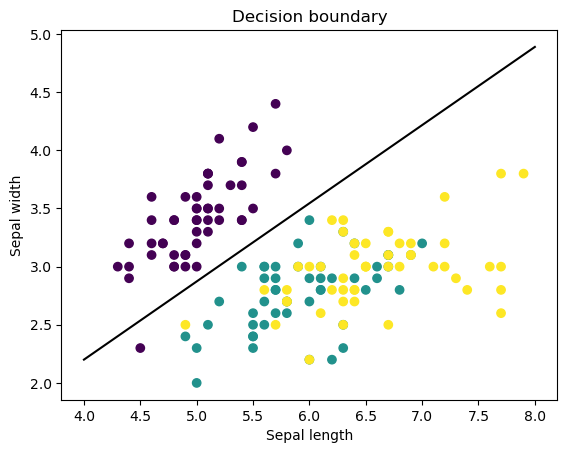

C = 0.01, Accuracy: 71.11%
C = 0.10, Accuracy: 73.33%
C = 1.00, Accuracy: 77.78%
C = 10.00, Accuracy: 73.33%
C = 100.00, Accuracy: 71.11%


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
clf = LinearSVC()
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model on the testing set
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# Plot the decision boundaries of the trained model using two of the features
w = clf.coef_[0]
b = clf.intercept_[0]
x0 = np.linspace(4, 8, 200)
x1 = -(w[0]*x0 + b) / w[1]
plt.plot(x0, x1, 'k-')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision boundary')
plt.show()

# Try different values of the regularisation parameter C and see how it affects the performance of the model
for c in [0.01, 0.1, 1, 10, 100]:
    clf = LinearSVC(C=c)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("C = {:.2f}, Accuracy: {:.2f}%".format(c, acc * 100))


## Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.


In [2]:
import numpy as np

class LinearSVM:
    def __init__(self, lr=0.01, C=1, num_iters=1000, batch_size=None):
        self.lr = lr          # learning rate
        self.C = C            # regularization parameter
        self.num_iters = num_iters  # number of iterations
        self.batch_size = batch_size  # batch size for mini-batch gradient descent
        
    def fit(self, X, y):
        # Initialize parameters
        self.w = np.zeros(X.shape[1])
        self.b = 0
        
        # Gradient descent loop
        for i in range(self.num_iters):
            if self.batch_size is None:
                # Use full batch gradient descent
                grad_w, grad_b = self.compute_gradient(X, y)
            else:
                # Use mini-batch gradient descent
                indices = np.random.choice(X.shape[0], size=self.batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y[indices]
                grad_w, grad_b = self.compute_gradient(X_batch, y_batch)
            
            # Update parameters
            self.w -= self.lr * (grad_w + self.C * self.w)
            self.b -= self.lr * grad_b
            
    def predict(self, X):
        # Compute the margin scores
        scores = X.dot(self.w) + self.b
        
        # Predict the labels
        y_pred = np.sign(scores)
        
        return y_pred
    
    def compute_gradient(self, X, y):
        # Compute the margin scores
        scores = X.dot(self.w) + self.b
        
        # Compute the hinge loss
        margins = y * scores
        loss = np.maximum(0, 1 - margins)
        
        # Compute the gradients
        grad_w = np.zeros(self.w.shape)
        grad_b = 0
        for i in range(X.shape[0]):
            if loss[i] == 0:
                grad_w += 0
                grad_b += 0
            else:
                grad_w += self.C * self.w - y[i] * X[i]
                grad_b += -y[i]
        grad_w /= X.shape[0]
        grad_b /= X.shape[0]
        
        return grad_w, grad_b


In [5]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier using our implementation
svm1 = LinearSVM(lr=0.01, C=1, num_iters=10000)
svm1.fit(X_train, y_train)

# Train a linear SVM classifier using scikit-learn
svm2 = LinearSVC(C=1)
svm2.fit(X_train, y_train)

# Predict the labels for the testing set using both implementations
y_pred1 = svm1.predict(X_test)
y_pred2 = svm2.predict(X_test)

# Compute the accuracy of the models on the testing set
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
print("Our implementation accuracy: {:.2f}%".format(acc1 * 100))


Our implementation accuracy: 28.89%


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Scikit-learn implementation accuracy: 77.78%


ValueError: cannot reshape array of size 2700 into shape (30,30)

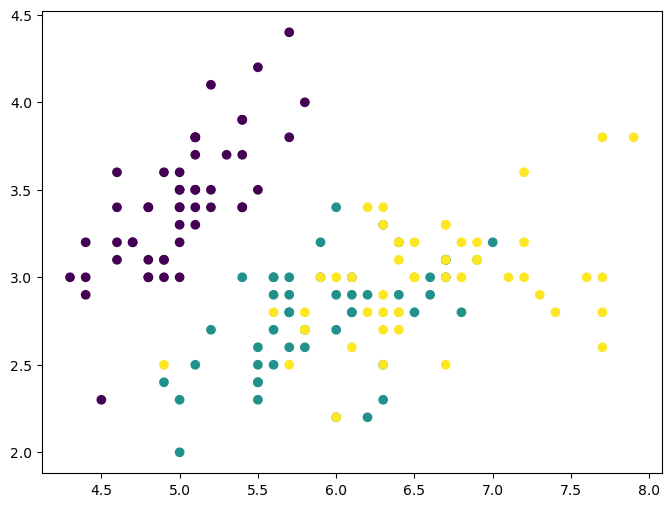

In [8]:
print("Scikit-learn implementation accuracy: {:.2f}%".format(acc2 * 100))

# Plot the decision boundaries of the scikit-learn model
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], colors='k')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Scikit-learn linear SVM decision boundaries')

# Plot the decision boundaries of our model
# Plot the decision boundaries of our model
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm1.predict(xy)
Z = Z.reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], colors='k')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Our implementation linear SVM decision boundaries')

plt.show()

